<a href="https://colab.research.google.com/github/Manmeetkaur17/Hex_KaggleDataset/blob/main/Hex_TitanicDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [40]:
traindf=pd.read_csv('/content/train.csv')

Understanding the dataset(EDA)

In [41]:
print(traindf.shape)

(891, 12)


In [42]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
print(traindf.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [44]:
traindf.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [45]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
print(traindf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [47]:
traindf.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


PREPERATION (Cleaning the dataset and removing the null values)

In [48]:
traindf['Age'].fillna(traindf['Age'].mean(), inplace=True)
traindf['Embarked'].fillna('C')
traindf.drop(['Cabin'], axis=1, inplace=True)




In [49]:
traindf.reset_index(drop=True, inplace=True)

In [50]:
traindf['age_group'] = pd.cut(traindf['Age'],
                         bins=[0, 12, 19, 34, 54, float('inf')],
                         labels=['Children', 'Teenagers', 'Young Adults', 'Adults', 'Seniors'])

In [51]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_group'],
      dtype='object')

In [52]:
age_group=traindf.groupby('Age')['Survived']

#Label encoding the categorical values of age group
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
traindf['age_group']=le.fit_transform(traindf['age_group'])

In [53]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


## Feature Understanding

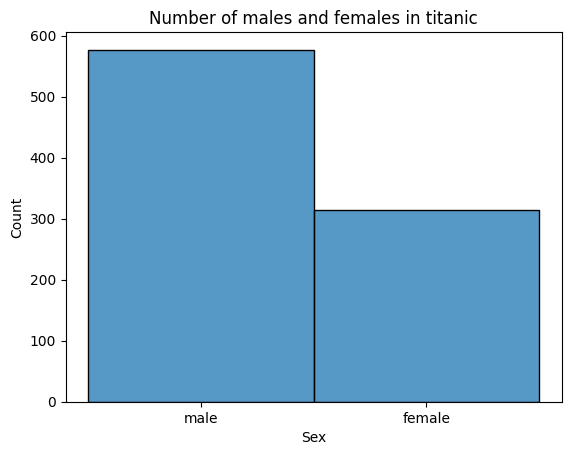

In [54]:
hist=sns.histplot(traindf['Sex'])
plt.xlabel("Sex")
plt.ylabel("Count")
hist.set_title("Number of males and females in titanic")
plt.show()


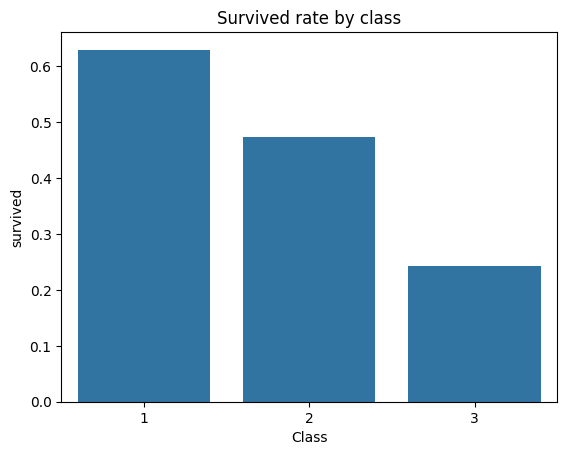

In [55]:
sns.barplot(x='Pclass',y='Survived', data=traindf, errorbar=None)
plt.xlabel("Class")
plt.ylabel("survived")
plt.title("Survived rate by class")
plt.show()

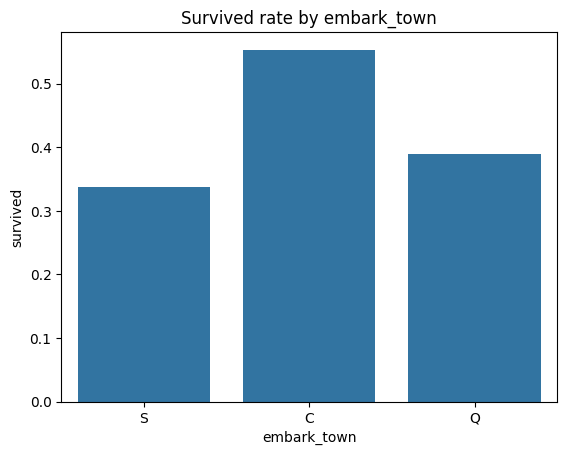

In [56]:
sns.barplot(x='Embarked',y='Survived', data=traindf, errorbar=None)
plt.xlabel("embark_town")
plt.ylabel("survived")
plt.title("Survived rate by embark_town")
plt.show()


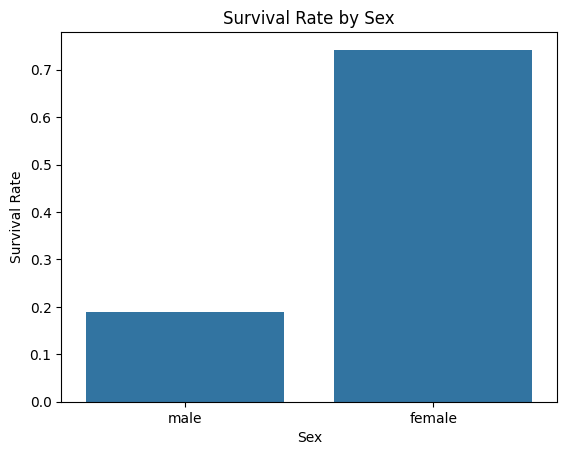

In [57]:
sns.barplot(x='Sex', y='Survived', data=traindf, ci=None)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

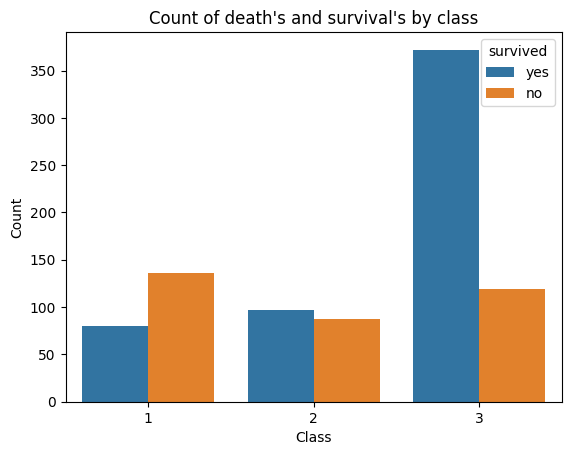

In [58]:
#countplot will count the Number of Death's and Survivor's by class
sns.countplot(x='Pclass', hue='Survived', data=traindf)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count of death's and survival's by class")
plt.legend(title='survived', labels=['yes','no'])
plt.show()

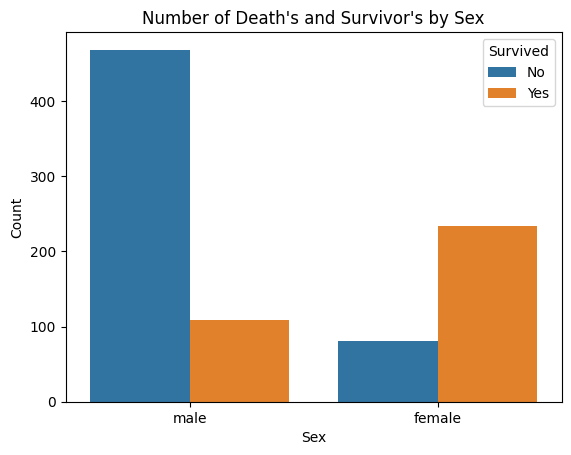

In [59]:
#countplot will count the Number of Death's and Survivor's by Sex
sns.countplot(x='Sex', hue='Survived', data=traindf)
plt.title("Number of Death's and Survivor's by Sex")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

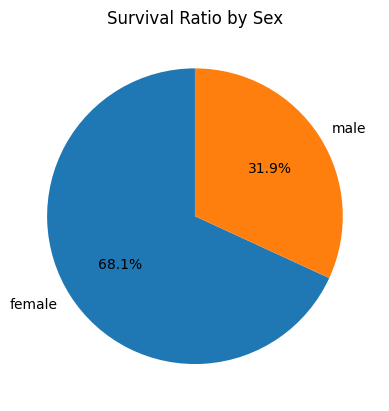

In [60]:
#Pie chart shows the portion of survival ratio of male and females
survived_sex=traindf.groupby('Sex')['Survived'].sum()
plt.pie(survived_sex, labels=survived_sex.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival Ratio by Sex')
plt.show()


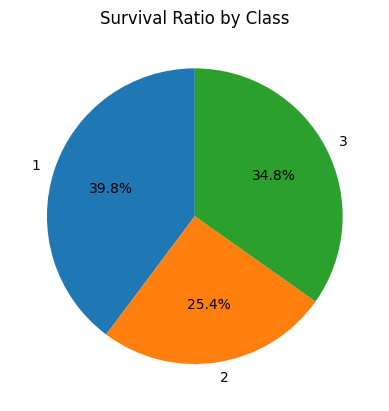

In [61]:
#Pie chart shows the portion of survival by class
survived_class=traindf.groupby('Pclass')['Survived'].sum()
plt.pie(survived_class,labels=survived_class.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival Ratio by Class')
plt.show()


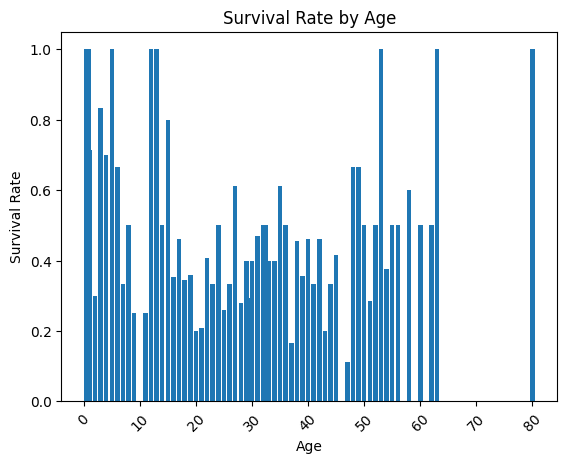

In [62]:
#survival by age
#survival by age
age_group = traindf.groupby('Age')['Survived'].mean() # Calculate the mean survival rate for each age group

plt.bar(age_group.index, age_group.values)
plt.xticks(rotation=45)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()


---
# **`Training the Model`**
---

In [74]:
encode=LabelEncoder()
traindf['Sex']=encode.fit_transform(traindf['Sex'])
traindf['Pclass']=encode.fit_transform(traindf['Pclass'])
traindf['Embarked']=encode.fit_transform(traindf['Embarked'])

In [75]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

In [76]:
#split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X=traindf[features]
y=traindf[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [77]:
#normalizing the numerical features
from sklearn.preprocessing import StandardScaler

numerical_features =['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
scaler=StandardScaler()

# Fit and transform only on the numerical features of the training data
X_train[numerical_features]=scaler.fit_transform(X_train[numerical_features])
# Transform the numerical features of the test data
X_test[numerical_features]=scaler.transform(X_test[numerical_features])

# Neural Networks

In [78]:
#neural networks
import tensorflow as tf

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
# Convert target variables to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

print(y_train.shape)
print(y_test.shape)

(712, 2)
(179, 2)


In [81]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,426 (44.63 KB)

 Trainable params: 11,426 (44.63 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy()
    ]
    )

In [83]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',min_delta=0,patience=10,verbose=1,
    mode='auto',restore_best_weights=True    #reassign the best weight in epoches
)
history=model.fit(X_train, y_train, batch_size=512,epochs=10_000,verbose=1,validation_data=(X_test, y_test), validation_split=0.0,  callbacks=[early_stopping])


Epoch 1/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 395ms/step - categorical_accuracy: 0.6182 - loss: 0.7502 - val_categorical_accuracy: 0.5754 - val_loss: 0.6991
Epoch 2/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - categorical_accuracy: 0.6244 - loss: 0.6824 - val_categorical_accuracy: 0.5810 - val_loss: 0.6486
Epoch 3/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - categorical_accuracy: 0.6533 - loss: 0.6454 - val_categorical_accuracy: 0.6257 - val_loss: 0.6117
Epoch 4/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.6662 - loss: 0.6156 - val_categorical_accuracy: 0.7207 - val_loss: 0.5820
Epoch 5/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.7017 - loss: 0.5879 - val_categorical_accuracy: 0.7654 - val_loss: 0.5569
Epoch 6/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - categorical_accuracy: 0.7359 - loss: 0.5633 - val_categorical_accuracy: 0.7989 - val_loss: 0.5345
Epoch 7/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.7569 - lo

In [84]:
import pandas as pd
history_df=pd.DataFrame(history.history)
history_df

,categorical_accuracy,loss,val_categorical_accuracy,val_loss
0,0.623595,0.741963,0.575419,0.699057
1,0.622191,0.683792,0.581006,0.648572
2,0.648876,0.647173,0.625698,0.611673
3,0.664326,0.616290,0.720670,0.582033
4,0.698034,0.590365,0.765363,0.556861
5,0.731742,0.565104,0.798883,0.534535
6,0.758427,0.546047,0.815642,0.514863
7,0.766854,0.532678,0.815642,0.497532
8,0.772472,0.513264,0.815642,0.483110
9,0.782303,0.517074,0.826816,0.471276


In [87]:
#evaluating model
model.evaluate(X_test, y_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8437 - loss: 0.3942 


[0.3835570216178894, 0.8379888534545898]

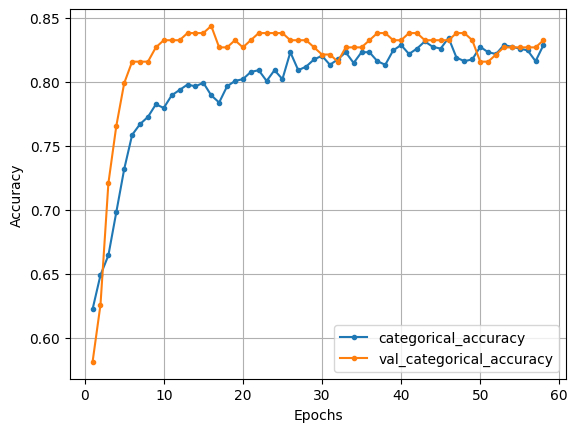

In [86]:
#accuracy
import matplotlib.pyplot as plt
history_df[['categorical_accuracy','val_categorical_accuracy']].iloc[1:].plot(marker='.')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

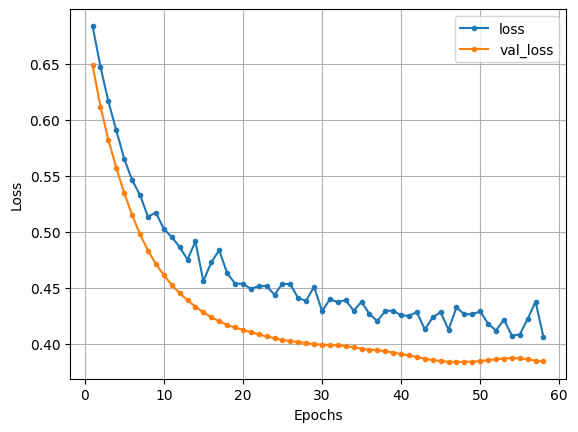

In [85]:
import matplotlib.pyplot as plt
history_df[['loss','val_loss']].iloc[1:].plot(marker='.')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()